In this notebook, the dataset is loaded and visualized. The source code is from sklearn documentation: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [7]:
from sklearn import datasets
import matplotlib.pyplot as plt # scatter plot
from sklearn.decomposition import PCA # PCA plot
from sklearn.linear_model import RidgeCV
import numpy as np

# 1. Visualize Iris dataset

In [6]:
# load dataset
iris = datasets.load_iris()

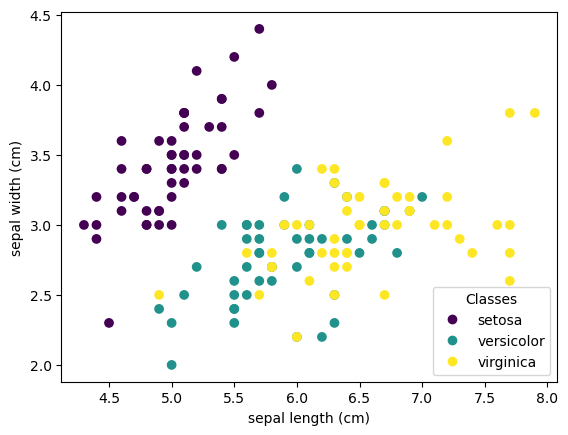

In [9]:
# scatter plot
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names,
    loc='lower right',
    title='Classes'
)

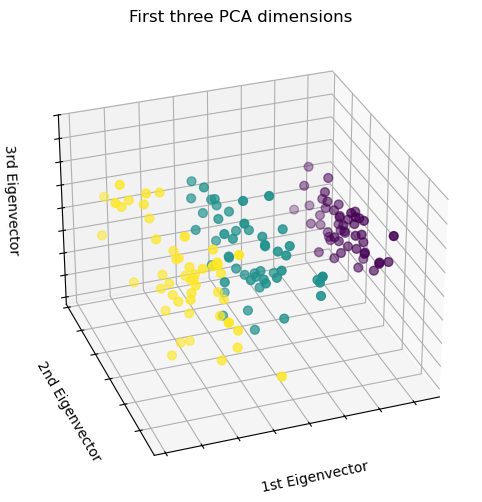

In [13]:
# PCA plot
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

# 2. Visualize diabete dataset

Feature selection link: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py

In [4]:
# load dataset
diabetes = datasets.load_diabetes()


In [5]:
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

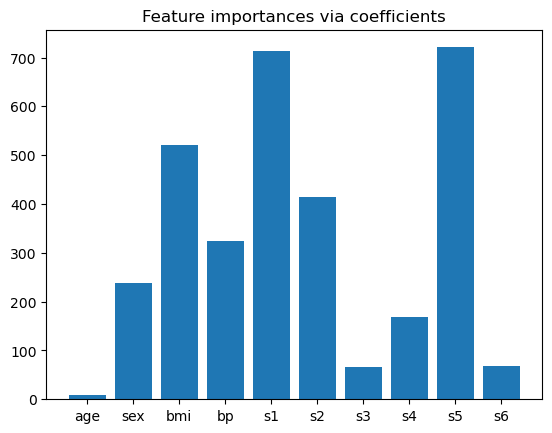

In [8]:
# use RidgeCV estimator to determine the importance of the features
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()